In [2]:
from sklearn.metrics import  f1_score, cohen_kappa_score, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read phonetic assessments

In [3]:
phonDF = pd.read_csv(
    '../../astla-data/dart-preposttest/slate-data/6-phonetic-transcriptions/final-annotations-wieke-loes-carlos.csv')
phonDF


,filename,wieke,loes,carlos,prompt_in_phonemes,majority_vote,count_majority_vote,conf_majority_vote,correct,abbreviations,Kolom3,category,comments_wieke,comments_loes,comments_carlos
0,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_jong,j O N,j O N,d j O N,j O N,j O N,2,0.67,1.0,prompt,NaN,prompt,NaN,NaN,NaN
1,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_lach,l A N,l A N,l A N,l A x,l A N,3,1.00,0.0,sub,NaN,substitution-x*ch*-as-N*ng*,NaN,NaN,NaN
2,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_strik,s t @ r I k,s t @ r I k,s t @ r I k,s t r I k,s t @ r I k,3,1.00,0.0,insSjwaCons,NaN,insertion-sjwaconsonantcluster,NaN,NaN,traag tempo
3,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_vuur,f y r,v y r,f y r,v y r,f y r,2,0.67,0.0,sub,NaN,substitution-v-f,NaN,NaN,r approx
4,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_specht,s p E h t,s p E t,@ s p E E t,s p E x t,s p E t,1,0.33,0.0,del,NaN,substitution-x*ch*-as-h*h*,NaN,NaN,lange E voor E X?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_nieuw,n i w,n i w,n i w,n i w,n i w,3,1.00,1.0,prompt,NaN,prompt,NaN,NaN,NaN
139,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_juicht,j UI p,j UI k t,j UI k t,j UI x t,j UI k t,2,0.67,0.0,sub,NaN,multi,NaN,NaN,NaN
140,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_vorst,s O r v,z O r f,s O r @ f,v O r s t,s O r f,1,0.33,0.0,multi,NaN,multi-substition-permutation,transposition,NaN,NaN
141,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_stuwdam,s t y w d A m,s t U w d A m,s t y w d A [m],s t y w d A m,s t y w d A m,2,0.67,1.0,prompt,NaN,prompt,NaN,NaN,wel een m toch


In [4]:
# Read binary scores (teachers and ASRs)
binaryDF = pd.read_csv(
    '../../astla-data/dart-preposttest/slate-data/7-binary-assessments/assessments.csv')
binaryDF


,Unnamed: 0,filename,1,2,3,4,6,7,8,9,...,52,53,54,55,novo_acc,novo_conf,whisper_acc,confidence,mean_teacher_accuracy,phonetic_description
0,0,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_jong,0,1,0,1,0,1,1,1,...,0,1,1,1,1,89.562,1,0.158,0.607843,correct
1,1,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_lach,1,0,1,0,1,0,0,0,...,1,0,0,0,1,53.776,0,0.282,0.392157,correct
2,2,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_strik,1,1,1,1,1,1,1,1,...,1,1,1,1,0,23.595,1,0.463,1.000000,melk-problem
3,3,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_vuur,1,1,1,1,0,1,1,1,...,1,1,1,1,1,73.275,1,0.212,0.901961,v-f-substitution
4,4,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_specht,1,1,1,0,1,0,1,1,...,1,1,1,1,0,36.638,1,0.026,0.901961,ij-è-substitution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,d52f2fbc-588a-4002-8c02-772dabdbfc16_vondst,1,0,1,0,1,0,0,0,...,1,0,0,0,0,22.211,1,0.025,0.392157,"false-start, st-j@s-substitution"
140,140,d52f2fbc-588a-4002-8c02-772dabdbfc16_bank,1,1,1,1,1,1,1,1,...,1,1,1,1,1,95.195,1,0.104,1.000000,correct
141,141,d52f2fbc-588a-4002-8c02-772dabdbfc16_markt,1,1,1,1,1,1,1,1,...,1,1,1,1,1,86.046,1,0.201,0.921569,correct
142,142,d52f2fbc-588a-4002-8c02-772dabdbfc16_spuw,0,1,0,1,0,1,1,1,...,0,1,1,0,1,48.434,1,0.007,0.568627,uw-@-substitution


In [14]:
# Add category abbreviations to binaryDF
phonDFCategories = phonDF[['filename', 'conf_majority_vote', 'correct', 'abbreviations']]
binaryDF = pd.merge(binaryDF, phonDFCategories, on='filename', how='outer')
print(len(binaryDF))
binaryDF.to_csv('../../astla-data/dart-preposttest/slate-data/10-output/dart-coreset-annotated.csv')


144


In [6]:
print(binaryDF[binaryDF['filename'] ==
      'e5920085-8c1b-415c-b25d-24b5e5a4a2bf_lijn'])


    Unnamed: 0                                   filename  1  2  3  4  6  7  \
47          47  e5920085-8c1b-415c-b25d-24b5e5a4a2bf_lijn  0  1  1  1  0  1   

    8  9  ...  55  novo_acc  novo_conf  whisper_acc  confidence  \
47  1  1  ...   0         1     98.161            1       0.589   

    mean_teacher_accuracy  phonetic_description  conf_majority_vote  correct  \
47               0.705882                  lijn                 1.0      1.0   

    abbreviations  
47         prompt  

[1 rows x 62 columns]


In [7]:
def correctAnnotationsForMissingWords(categoryLabel):
    if isinstance(categoryLabel, float):
        return 'delWord'
    return categoryLabel


def correctAnnotationsForMissingWords_correct(assessment):
    if np.isnan(assessment):
        return 0
    return assessment


def correctAnnotationsForMissingWords_conf(confidence):
    if np.isnan(confidence):
        return 0
    return confidence


# Empty abbreviations indicate that the word is missing in the read speech
# Replace these annotations with 'delWord'
binaryDF['abbreviations'] = binaryDF['abbreviations'].apply(
    lambda x: correctAnnotationsForMissingWords(x))

binaryDF['correct'] = binaryDF['correct'].apply(
    lambda x: correctAnnotationsForMissingWords_correct(x))

binaryDF['conf_majority_vote'] = binaryDF['correct'].apply(
    lambda x: correctAnnotationsForMissingWords_conf(x))

print(binaryDF[binaryDF['abbreviations'] == 'delWord'])



    Unnamed: 0                                       filename  1  2  3  4  6  \
94          94  97549707-f715-4fe5-926c-b272b388e368_vreemdst  1  0  1  0  0   

    7  8  9  ...  55  novo_acc  novo_conf  whisper_acc  confidence  \
94  0  0  0  ...   0         0     16.173            0         0.0   

    mean_teacher_accuracy  phonetic_description  conf_majority_vote  correct  \
94               0.392157       word is missing                 0.0      0.0   

    abbreviations  
94        delWord  

[1 rows x 62 columns]


In [8]:
binaryDF.iloc[:,2:53]

,1,2,3,4,6,7,8,9,10,11,...,44,47,48,49,50,51,52,53,54,55
0,0,1,0,1,0,1,1,1,1,1,...,1,0,1,0,1,1,0,1,1,1
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
140,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
141,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
142,0,1,0,1,0,1,1,1,0,1,...,1,0,1,1,1,1,0,1,1,0


In [9]:
" ".join(str(list(binaryDF['correct'])))

'[ 1 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   1 . 0 ,   0 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,   1 . 0 ,   0 . 0 ,

In [10]:
def getMajorityVote(row):
    return 1 if sum(row)/len(row) >= 0.5 else 0


teacherDF = binaryDF.iloc[:, 2:53]
teacherArray = teacherDF.apply(getMajorityVote, axis=1)
binaryDF['teacherAssessmentMV'] = teacherArray

novoArray = binaryDF['novo_acc']

whisperArray = binaryDF['whisper_acc']

expertArray = binaryDF['correct']
expertArrayContinuous = binaryDF['conf_majority_vote']
teacherArrayContinuous = binaryDF['mean_teacher_accuracy']


def getWhisperAccScores001cutoff(row):
    return row['whisper_acc'] == 1 and row['confidence'] > 0.01


def getWhisperAccScores003cutoff(row):
    return row['whisper_acc'] == 1 and row['confidence'] > 0.03

def getWhisperAccScores005cutoff(row):
    return row['whisper_acc'] == 1 and row['confidence'] > 0.05

def getWhisperAccScores01cutoff(row):
    return row['whisper_acc'] == 1 and row['confidence'] > 0.1


def getWhisperAccScores02cutoff(row):
    return row['whisper_acc'] == 1 and row['confidence'] > 0.2


whisperArray001 = binaryDF.apply(getWhisperAccScores001cutoff, axis=1)
whisperArray003 = binaryDF.apply(getWhisperAccScores003cutoff, axis=1)
binaryDF['whisper_conf003'] = [1 if item==True else 0 for item in binaryDF.apply(getWhisperAccScores003cutoff, axis=1)]
whisperArray005 = binaryDF.apply(getWhisperAccScores005cutoff, axis=1)
whisperArray01 = binaryDF.apply(getWhisperAccScores01cutoff, axis=1)
whisperArray02 = binaryDF.apply(getWhisperAccScores02cutoff, axis=1)


In [11]:
from varname import nameof

print(['TN (0,0)', 'FP (0,1)'])
print(['FN (1,0)', 'TP (1,1)'])
print("teacher array is truth (or in case novo-whisper, novo-array is truth)\n")

def printStatistics(x,y):
    cm = confusion_matrix(x, y)
    MCC = matthews_corrcoef(x, y)
    F1 = f1_score(x, y)
    CK = cohen_kappa_score(x,y)
    print(cm)
    print('MCC:', MCC, '- F1', F1, '- CK:', CK)

print('\ntrue: teacherAssessments & pred: novoAssessments')
printStatistics(teacherArray, novoArray)
print('\ntrue: teacherAssessments & pred: whisperAssessments')
printStatistics(teacherArray, whisperArray)
print('\ntrue: novoAssessments & pred: whisperAssessments')
printStatistics(novoArray, whisperArray)


['TN (0,0)', 'FP (0,1)']
['FN (1,0)', 'TP (1,1)']
teacher array is truth (or in case novo-whisper, novo-array is truth)


true: teacherAssessments & pred: novoAssessments
[[23 11]
 [34 76]]
MCC: 0.3190464212366108 - F1 0.7715736040609137 - CK: 0.29778933680104025

true: teacherAssessments & pred: whisperAssessments
[[  5  29]
 [  4 106]]
MCC: 0.19421215222354457 - F1 0.8653061224489796 - CK: 0.1483870967741936

true: novoAssessments & pred: whisperAssessments
[[ 5 52]
 [ 4 83]]
MCC: 0.0843305926336084 - F1 0.7477477477477477 - CK: 0.04883227176220806


In [12]:
print('\ntrue: teacherAssessments & pred: whisper001Assessments')
printStatistics(teacherArray, whisperArray001)
print('\ntrue: teacherAssessments & pred: whisper003Assessments')
printStatistics(teacherArray, whisperArray003)
print('\ntrue: teacherAssessments & pred: whisper005Assessments')
printStatistics(teacherArray, whisperArray005)
print('\ntrue: teacherAssessments & pred: whisper01Assessments')
printStatistics(teacherArray, whisperArray01)
print('\ntrue: teacherAssessments & pred: whisper02Assessments')
printStatistics(teacherArray, whisperArray02)



true: teacherAssessments & pred: whisper001Assessments
[[15 19]
 [13 97]]
MCC: 0.3465956621029663 - F1 0.8584070796460176 - CK: 0.3439635535307517

true: teacherAssessments & pred: whisper003Assessments
[[26  8]
 [21 89]]
MCC: 0.5197076629536752 - F1 0.8599033816425121 - CK: 0.5068493150684932

true: teacherAssessments & pred: whisper005Assessments
[[26  8]
 [28 82]]
MCC: 0.447532350775994 - F1 0.8200000000000001 - CK: 0.42400000000000004

true: teacherAssessments & pred: whisper01Assessments
[[27  7]
 [40 70]]
MCC: 0.3665281298838527 - F1 0.7486631016042781 - CK: 0.3223868642370845

true: teacherAssessments & pred: whisper02Assessments
[[31  3]
 [53 57]]
MCC: 0.370369295191264 - F1 0.6705882352941176 - CK: 0.2851063829787235


In [139]:
printStatistics(expertArray, novoArray)
printStatistics(expertArray, whisperArray)
printStatistics(expertArray, whisperArray003)
printStatistics(expertArray, teacherArray)


[[38 31]
 [19 56]]
MCC: 0.30379903402325564 - F1 0.6913580246913581 - CK: 0.29947460595446584
[[ 6 63]
 [ 3 72]]
MCC: 0.09690874237046979 - F1 0.6857142857142858 - CK: 0.048648648648648596
[[37 32]
 [10 65]]
MCC: 0.42925571518584654 - F1 0.7558139534883721 - CK: 0.4081033470346447
[[31 38]
 [ 3 72]]
MCC: 0.4814320264522622 - F1 0.7783783783783784 - CK: 0.41775147928994083


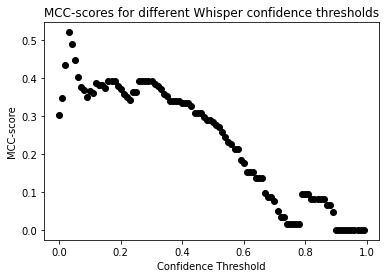

In [163]:
def getWhisperAccScoresCutoff(whisperAccArray, whisperConfArray, threshold):
    return [1 if item == 1 and whisperConfArray[idx]>threshold else 0 for idx, item in enumerate(whisperAccArray)]

whisperArray001 = binaryDF.apply(getWhisperAccScores001cutoff, axis=1)

fig, ax = plt.subplots()

plt.title("MCC-scores for different Whisper confidence thresholds")

thresholdsArray = np.arange(0, 1, 0.01)
mccArray = []
for threshold in thresholdsArray:
    whisper_pred = getWhisperAccScoresCutoff(
        binaryDF['whisper_acc'], binaryDF['confidence'], threshold)
    MCC = matthews_corrcoef(teacherArray, whisper_pred)
    mccArray.append(MCC)

ax.scatter(thresholdsArray, mccArray, color='black')
ax.set_xlabel("Confidence Threshold")
ax.set_ylabel("MCC-score")

plt.show()


In [53]:
idx_max = mccArray.index(max(mccArray))
thresholdsArray[idx_max]

0.03

### Histograms

In [ ]:
plt.hist(df['individuals'], bins=25, alpha=0.45, color='red')
plt.hist(df['family_members'], bins=25, alpha=0.45, color='blue')

x = statsDF['accuracy']

plt.hist(x, fill=False, hatch='')
plt.title("Histogram \n Mean Teacher Correctness Scores")
#plt.xticks([1], ['Accuracy'])
# plt.grid()
plt.ylabel("Number of words")
plt.xlabel("Mean Teacher Correctness Score")
plt.show()


In [166]:
fig, ax = plt.subplots(layout='constrained')

ax = plt.hist(binaryDF['mean_teacher_accuracy'], bins=3, fill=False, hatch='')
plt.hist(binaryDF['conf_majority_vote'], bins=3, fill=False, hatch='.')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.hist(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)
plt.show()


TypeError: cannot unpack non-iterable AxesSubplot object

In [174]:
binaryDF['conf_majority_vote']


0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
139    0.0
140    1.0
141    1.0
142    0.0
143    0.0
Name: conf_majority_vote, Length: 144, dtype: float64

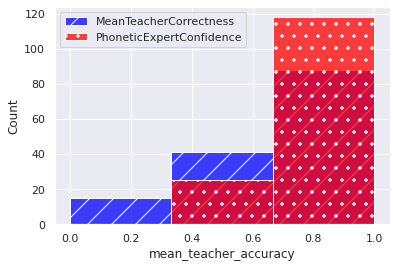

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

phonDF['confidence'] = [x/3 for x in list(phonDF['count_majority_vote'])]

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=binaryDF, x="mean_teacher_accuracy", bins = 3, color = 'blue', hatch='/',
             label="MeanTeacherCorrectness")
sns.histplot(data=phonDF, x="confidence", bins= [0,1/3,2/3,1.0], color = 'red', hatch='.',
             label="PhoneticExpertConfidence")

plt.legend()
plt.show()


# Phonetic category analysis

In [54]:
binaryDF.head()

,Unnamed: 0,filename,1,2,3,4,6,7,8,9,...,55,novo_acc,novo_conf,whisper_acc,confidence,mean_teacher_accuracy,phonetic_description,abbreviations,teacherAssessmentMV,whisper_conf003
0,0,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_jong,0,1,0,1,0,1,1,1,...,1,1,89.562,1,0.158,0.607843,correct,prompt,1,1
1,1,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_lach,1,0,1,0,1,0,0,0,...,0,1,53.776,0,0.282,0.392157,correct,sub,0,0
2,2,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_strik,1,1,1,1,1,1,1,1,...,1,0,23.595,1,0.463,1.000000,melk-problem,insSjwaCons,1,1
3,3,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_vuur,1,1,1,1,0,1,1,1,...,1,1,73.275,1,0.212,0.901961,v-f-substitution,sub,1,1
4,4,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_specht,1,1,1,0,1,0,1,1,...,1,0,36.638,1,0.026,0.901961,ij-è-substitution,del,1,0


In [55]:
# Phonetic correctness
def getPhoneticCorrectness(row):
    print(row['filename'], row['abbreviations'])
    return 1 if 'prompt' in row['abbreviations'] else 0

binaryDF['phoneticAssessment_MV'] = binaryDF.apply(getPhoneticCorrectness, axis=1)
binaryDF


09eae7df-db7c-491b-b7c4-a7c9fcf62f47_jong prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_lach sub
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_strik insSjwaCons
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_vuur sub
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_specht del
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_keelpijn prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_sla multi
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_buiten multi
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_kous sub
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_pink prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_schuur prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_huisje multi
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_tussen multi
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_fop prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_zwart insMultiInc
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_koen prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_denk multi
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_boomstam prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_muis prompt
09eae7df-db7c-491b-b7c4-a7c9fcf62f47_schrift insSjwaCons
0

,Unnamed: 0,filename,1,2,3,4,6,7,8,9,...,novo_acc,novo_conf,whisper_acc,confidence,mean_teacher_accuracy,phonetic_description,abbreviations,teacherAssessmentMV,whisper_conf003,phoneticAssessment_MV
0,0,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_jong,0,1,0,1,0,1,1,1,...,1,89.562,1,0.158,0.607843,correct,prompt,1,1,1
1,1,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_lach,1,0,1,0,1,0,0,0,...,1,53.776,0,0.282,0.392157,correct,sub,0,0,0
2,2,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_strik,1,1,1,1,1,1,1,1,...,0,23.595,1,0.463,1.000000,melk-problem,insSjwaCons,1,1,0
3,3,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_vuur,1,1,1,1,0,1,1,1,...,1,73.275,1,0.212,0.901961,v-f-substitution,sub,1,1,0
4,4,09eae7df-db7c-491b-b7c4-a7c9fcf62f47_specht,1,1,1,0,1,0,1,1,...,0,36.638,1,0.026,0.901961,ij-è-substitution,del,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,d52f2fbc-588a-4002-8c02-772dabdbfc16_vondst,1,0,1,0,1,0,0,0,...,0,22.211,1,0.025,0.392157,"false-start, st-j@s-substitution",insMultiInc,0,0,0
140,140,d52f2fbc-588a-4002-8c02-772dabdbfc16_bank,1,1,1,1,1,1,1,1,...,1,95.195,1,0.104,1.000000,correct,prompt,1,1,1
141,141,d52f2fbc-588a-4002-8c02-772dabdbfc16_markt,1,1,1,1,1,1,1,1,...,1,86.046,1,0.201,0.921569,correct,prompt,1,1,1
142,142,d52f2fbc-588a-4002-8c02-772dabdbfc16_spuw,0,1,0,1,0,1,1,1,...,1,48.434,1,0.007,0.568627,uw-@-substitution,multi,1,0,0


In [56]:
counts = binaryDF['abbreviations'].value_counts()
counts

prompt         73
multi          18
sub            13
insMultiCor    10
del             9
insMultiInc     6
insFinalN       6
insSjwaCons     5
ins             3
delWord         1
Name: abbreviations, dtype: int64

In [57]:
def computePercCor(seriesOfValues):
    return (seriesOfValues.sum() / len(seriesOfValues)) * 100

def computePercInc(seriesOfValues):
    return (100 - (seriesOfValues.sum() / len(seriesOfValues)) * 100)


unique_labels = binaryDF['abbreviations'].value_counts().index

scoringDF = pd.DataFrame()
for label in unique_labels:
    selectionDF = binaryDF[binaryDF['abbreviations'] == label]

    scoringDF.loc[label, 'N'] = len(selectionDF)

    scoringDF.loc[label, 'teacher_cor'] = computePercCor(selectionDF['teacherAssessmentMV'])
    scoringDF.loc[label, 'teacher_inc'] = computePercInc(
        selectionDF['teacherAssessmentMV'])
    
    scoringDF.loc[label, 'expert_cor'] = computePercCor(selectionDF['phoneticAssessment_MV'])
    scoringDF.loc[label, 'expert_inc'] = computePercInc(
        selectionDF['phoneticAssessment_MV'])

    scoringDF.loc[label, 'novo_cor']=computePercCor(selectionDF['novo_acc'])
    scoringDF.loc[label, 'novo_inc'] = computePercInc(selectionDF['novo_acc'])

    scoringDF.loc[label, 'wh_cor']=computePercCor(selectionDF['whisper_acc'])
    scoringDF.loc[label, 'wh_inc'] = computePercInc(selectionDF['whisper_acc'])

    scoringDF.loc[label, 'wh003_cor']=computePercCor(selectionDF['whisper_conf003'])
    scoringDF.loc[label, 'wh003_inc'] = computePercInc(
        selectionDF['whisper_conf003'])


scoringDF.to_csv('../../astla-data/dart-preposttest/slate-data/7-figures/table-phonetic-category-analysis.csv')


    



### Print phonetic descriptions

In [58]:
def printDescriptionsOfFPsNovo(accuracy_col, ):
    if (row['mean_teacher_accuracy'] < 0.5 and row['novo_acc'] == 1):
        print(row['phonetic_description'])


def printDescriptionsOfFNsNovo(row):
    if (row['mean_teacher_accuracy'] >= 0.5 and row['novo_acc'] == 0):
        print(row['phonetic_description'])


print("False positives:")
binaryDF.apply(lambda x: printDescriptionsOfFPsNovo(binaryDF['novo_acc']), axis=1)

print("\nFalse negatives:")
binaryDF.apply(printDescriptionsOfFNsNovo, axis=1)


False positives:


NameError: name 'row' is not defined

Final report:

Of all spelled words (N=3), Whisper recognizes 100% (N=3) and Novo 66% (N=2).

### Conclusion
- Novo has higher MCC than Whisper.
- Novo is better in recognizing incorrectly pronounced words


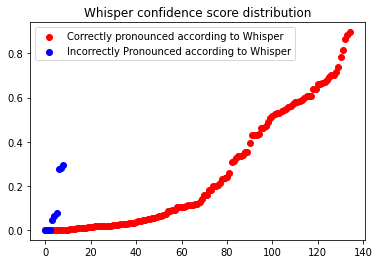

In [25]:
# Scatterplot of Whisper confidence scores

whisperTrue = binaryDF[binaryDF['whisper_acc'] == 1]
whisperFalse = binaryDF[binaryDF['whisper_acc'] == 0]

fig, ax = plt.subplots()
plt.xlabel = "word index"
plt.ylabel = "whisper confidence score"
plt.title("Whisper confidence score distribution")

ax.scatter(
    np.arange(0, len(whisperTrue['confidence']), 1), whisperTrue['confidence'].sort_values(), color='red', label='Correctly pronounced according to Whisper')
ax.scatter(
    np.arange(0, len(whisperFalse['confidence']), 1), whisperFalse['confidence'].sort_values(), color='blue', label='Incorrectly Pronounced according to Whisper')


ax.legend()
plt.show()

Density clustering

EPS=3

In [26]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array(np.array(teacherDF))
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
print(clustering.labels_)

[ 0  1  0  0  0  0  2  1  0  0  0  2  1  0  1  0  1  0  0  0  0  0  1  0
  1  0  2  1  0  1 -1  0  0  0  0  0  0  0  2  2  2  1  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1 -1  0  0  0  2  2  1  0  0  0  0  1  0  0  0 -1 -1  0  0  0  0  1  0
  0  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  1  0  0  0  2  1  0  2
  0  0  0  0  0  0  1  0  0  0  2  1  0  0  0  0  1  0  0  1  0  0  0  2]


In [27]:
binaryDF['clustering']=clustering.labels_

for cluster_nr in [-1,0,1,2]:
    print(cluster_nr)
    print(binaryDF[binaryDF['clustering'] == cluster_nr]['mean_teacher_accuracy'].min())
    print(binaryDF[binaryDF['clustering'] == cluster_nr]['mean_teacher_accuracy'].max())
    print("\n")


-1
0.647058824
0.784313725


0
0.490196078
1.0


1
0.254901961
0.607843137


2
0.0
0.196078431




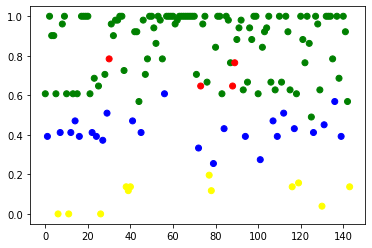

In [28]:
import matplotlib.pyplot as plt

colors = {-1: 'red', 0: 'green',
          1: 'blue', 2: 'yellow'}
plt.scatter(np.arange(len(binaryDF)),
            binaryDF['mean_teacher_accuracy'], c=binaryDF['clustering'].map(colors))


EPS=2

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array(np.array(teacherDF))
clustering = DBSCAN(eps=2, min_samples=2).fit(X)
print(clustering.labels_)


[ 0  1  2  2 -1  0  3  1  2  2  0  3  1  0  1  0  1  2  2  2  2  0  1  0
  1  0  3  1  0 -1 -1  2  2  2  2  2  2 -1 -1 -1 -1  1  2  2  0  1  2  0
 -1  2  2  2 -1  2  2 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  0
 -1 -1  2  2  0 -1 -1 -1 -1  2  2  0  1  2  2 -1 -1 -1  2  2  2  0  1  0
  2  4  2  2  0 -1  4  2  2  2  0  1  0  1  2  0 -1  2  2 -1 -1  1  0 -1
  2  2 -1  2 -1 -1  1  2  2  0  3 -1  2  2  2 -1 -1  2  0  1  2  2 -1 -1]


In [30]:
binaryDF['clustering'] = clustering.labels_

for cluster_nr in [-1, 0, 1, 2, 3, 4]:
    print(cluster_nr)
    print(binaryDF[binaryDF['clustering'] == cluster_nr]
          ['mean_teacher_accuracy'].min())
    print(binaryDF[binaryDF['clustering'] == cluster_nr]
          ['mean_teacher_accuracy'].max())
    print("\n")


-1
0.117647059
0.901960784


0
0.568627451
0.705882353


1
0.37254902
0.470588235


2
0.882352941
1.0


3
0.0
0.039215686


4
0.843137255
0.882352941




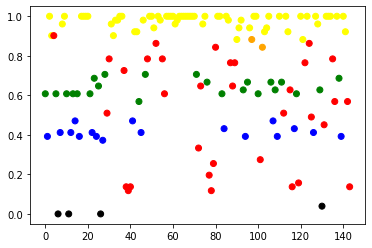

In [31]:
import matplotlib.pyplot as plt

colors = {-1: 'red', 0: 'green',
          1: 'blue', 2: 'yellow', 3: 'black', 4: 'orange'}
plt.scatter(np.arange(len(binaryDF)),
            binaryDF['mean_teacher_accuracy'], c=binaryDF['clustering'].map(colors))


ValueError: x and y must be the same size

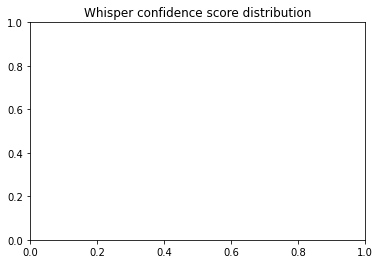

In [32]:
# Scatterplot of Whisper confidence scores (colored using teacher assessment)

whisperTrue = binaryDF[binaryDF['mean_teacher_accuracy'] >= 0.5]
whisperFalse = binaryDF[binaryDF['mean_teacher_accuracy'] < 0.5]

fig, ax = plt.subplots()
plt.xlabel = "word index"
plt.ylabel = "whisper confidence score"
plt.title("Whisper confidence score distribution")

ax.scatter(
    np.arange(0, len(binaryDF['novo_acc']), 1), whisperTrue['confidence'].sort_values(), color='red', label='Correctly pronounced according to Teachers')
ax.scatter(
    np.arange(0, len(whisperFalse['confidence']), 1), whisperFalse['confidence'].sort_values(), color='blue', label='Incorrectly pronounced according to Teachers')


ax.legend()
plt.show()


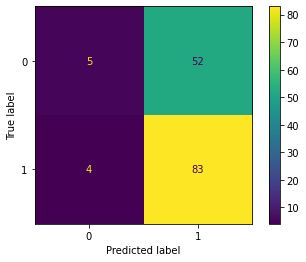

In [33]:
cm = confusion_matrix(novoArray, whisperArray)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


Scatter plot